<a href="https://colab.research.google.com/github/young-hwanlee/my-practical-statistics-for-data-scientists/blob/main/Chapter_2_Data_and_Sampling_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practical Statistics for Data Scientists (Python)**
# **Chapter 2. Data and Sampling Distributions**
> (c) 2019 Peter C. Bruce, Andrew Bruce, and Peter Gedeck

Import required Python packages.

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
# try:
#     import common
#     DATA = common.dataDirectory()
# except ImportError:
#     DATA = Path().resolve() / 'data'

Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [3]:
# LOANS_INCOME_CSV = DATA / 'loans_income.csv'
# SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

DATA = 'https://raw.githubusercontent.com/young-hwanlee/practical-statistics-for-data-scientists/master/data/'

LOANS_INCOME_CSV = DATA + 'loans_income.csv'
SP500_DATA_CSV = DATA + 'sp500_data.csv.gz'

Figure 2.1

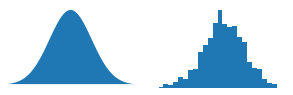

In [4]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

## **2.1 Random Sampling and Sample Bias**

http://www.capitalcentury.com/1935.html

## **2.2 Selection Bias**

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2917255/

https://www.priceactionlab.com/Blog/2012/06/fooled-by-randomness-through-selection-bias/

## **2.3 Sampling Distribution of a Statistic**

In [5]:
loans_income = pd.read_csv(LOANS_INCOME_CSV, squeeze=True)
# loans_income = pd.read_csv(LOANS_INCOME_CSV)
print(loans_income.head(5))
print(loans_income.shape)

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64
(50000,)


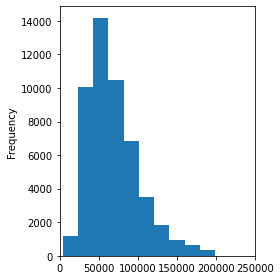

In [6]:
loans_income.plot.hist(xlim=[0, 250000], figsize=(4, 4))
ax.set_xlabel('Income')

plt.tight_layout()
plt.show()

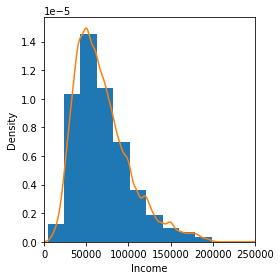

In [7]:
ax = loans_income.plot.hist(density=True, xlim=[0, 250000], figsize=(4, 4))
loans_income.plot.density(ax=ax)
ax.set_xlabel('Income')

plt.tight_layout()
plt.show()

In [8]:
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})
print(sample_data.head(5))
print(sample_data.shape)

       income  type
40292   63000  Data
38959   92000  Data
17361  134000  Data
33996   52000  Data
26491   43000  Data
(1000, 2)


In [9]:
sample_data.head(5)

,income,type
40292,63000,Data
38959,92000,Data
17361,134000,Data
33996,52000,Data
26491,43000,Data


In [10]:
sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())
print(results.shape)

         income  type
40292   63000.0  Data
38959   92000.0  Data
17361  134000.0  Data
33996   52000.0  Data
26491   43000.0  Data
(3000, 2)


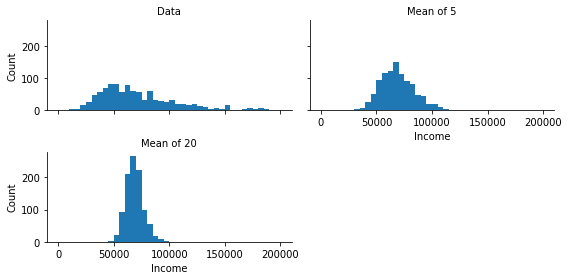

In [11]:
g = sns.FacetGrid(results, col='type', col_wrap=2,
                 height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

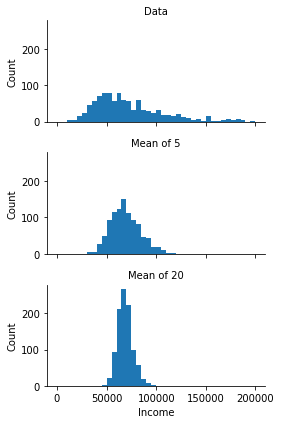

In [12]:
g = sns.FacetGrid(results, col='type', col_wrap=1,
                 height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

https://onlinestatbook.com/stat_sim/sampling_dist/

## **2.4 The Bootstrap**

In [13]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std.error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -82.09799999999814
std.error: 228.73933106830748


In [14]:
print('original: {loans_income.median()}')

original: {loans_income.median()}


## **2.5 Confidence Intervals**

In [15]:
print('Loan Applicants\' Average Income : $', loans_income.mean())
np.random.seed(seed=3)

# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print('Average of Samples from above : $', sample20.mean())

Loan Applicants' Average Income : $ 68760.51844
Average of Samples from above : $ 55734.1


In [16]:
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
print(results)
results = pd.Series(results)
print(results)

[47060.0, 52950.0, 63918.2, 40156.0, 46462.0, 34971.0, 59599.1, 62730.0, 49234.1, 43463.1, 61834.1, 54184.1, 69606.2, 61176.2, 49303.2, 52290.1, 67647.2, 61385.1, 50371.0, 61241.2, 55993.1, 49515.0, 54684.1, 67445.3, 62913.1, 47363.1, 48115.0, 56447.2, 61401.3, 56242.0, 71738.4, 49274.0, 60686.0, 58600.0, 63039.3, 46640.1, 70395.3, 58043.1, 52230.0, 56638.2, 44706.0, 45628.1, 60608.1, 75952.1, 62352.4, 52112.0, 60110.3, 41754.0, 65241.2, 51226.2, 46733.0, 47219.1, 54043.1, 58230.0, 53349.1, 49097.2, 49582.2, 62162.0, 52693.1, 48949.1, 50312.2, 50490.1, 56138.2, 53006.0, 61382.2, 42634.1, 65025.1, 47715.0, 52721.0, 58384.1, 43050.0, 54833.0, 58027.0, 63336.0, 49883.0, 51069.1, 54356.2, 70815.0, 48906.0, 54025.1, 60059.2, 68877.2, 61384.1, 62175.1, 43963.1, 47512.0, 57632.2, 57949.1, 47412.0, 65934.1, 46619.1, 51214.1, 45884.1, 55775.1, 56915.0, 64860.0, 47601.3, 60991.2, 59406.2, 53614.1, 51128.1, 57847.2, 52963.1, 58437.1, 53263.1, 67154.3, 44513.1, 58913.1, 73530.0, 62202.1, 79128.1, 

In [17]:
confidence_interval = list(results.quantile([0.05, 0.95]))
confidence_interval

[43212.45, 70233.43999999999]

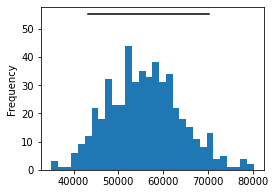

In [18]:
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')

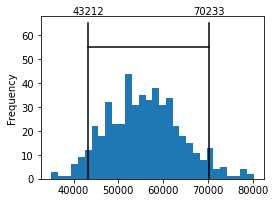

In [19]:
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')

for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}',
            horizontalalignment='center', verticalalignment='center')

Text(56722.94499999999, 60, '90% interval')

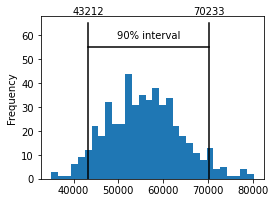

In [20]:
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')

for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}',
            horizontalalignment='center', verticalalignment='center')

ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

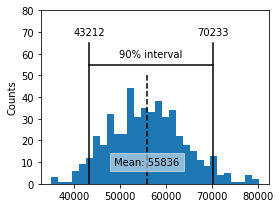

In [21]:
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')

for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}',
            horizontalalignment='center', verticalalignment='center')

ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

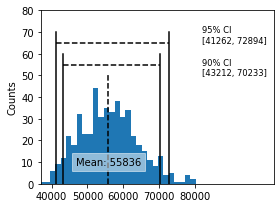

In [22]:
np.random.seed(seed=3)

# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

# 90% Confidence Interval
confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

# 95% Confidence Interval
confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
# ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
#         bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
#         horizontalalignment='center', verticalalignment='center')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

## **2.6 Normal Distribution**
### **2.6.1 Standard Normal and QQ-Plots**

The package *scipy* has the function (scipy.stats.probplot) to create QQ-plots. The argument dist specifies the distribution, which is set by default to the normal distribution.

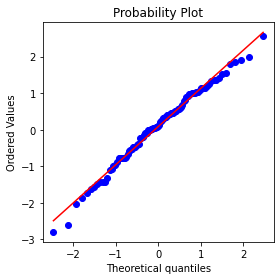

In [23]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

## **2.7 Long-Tailed Distributions**

In [24]:
sp500_px = pd.read_csv(SP500_DATA_CSV)
sp500_px.shape

(5647, 518)

In [25]:
sp500_px.head(5)

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,ADI,AVGO,BRCM,FSLR,INTC,LLTC,MCHP,MU,NVDA,QRVO,QCOM,SWKS,TXN,XLNX,AAPL,HPQ,EA,SNDK,STX,WDC,TEL,HRS,MSI,ACN,AMAT,KLAC,LRCX,ADBE,ADSK,...,ENDP,LLY,MNK,MRK,MYL,PRGO,PFE,ZTS,ABT,A,BCR,BAX,BDX,BSX,EW,HSP,ISRG,JNJ,MDT,PKI,STJ,SYK,TMO,VAR,ZBH,BMY,CAH,CERN,ESRX,MCK,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,-0.015785,0.0,0.0,0.0,-0.050488,-0.089870,0.0,0.037021,0.0,0.0,-0.044718,-0.041262,0.060179,0.033152,-0.024235,0.045586,0.12500,0.0,0.0,0.118103,0.0,0.016412,-1.842719,0.0,-0.012867,0.079940,0.246706,-0.044884,0.057267,...,0.0,-0.077535,0.0,-0.028797,0.166355,-0.577943,0.066591,0.0,0.045961,0.0,-0.326659,0.000000,-0.033363,0.06250,0.0,0.0,0.0,0.018827,0.006047,0.000000,0.187132,0.276317,-0.124187,0.037430,0.0,0.038546,0.060142,0.03126,0.00195,0.0,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,-0.015793,0.0,0.0,0.0,0.095367,0.044935,0.0,0.037020,0.0,0.0,0.006387,-0.041252,0.102317,0.099446,0.064618,0.072942,0.09375,0.0,0.0,0.000000,0.0,-0.032829,0.594428,0.0,0.016077,0.019985,0.411170,0.134672,0.057267,...,0.0,-0.031014,0.0,-0.172781,-0.066536,0.346766,-0.027745,0.0,-0.045960,0.0,-0.093331,0.018157,0.100076,0.03125,0.0,0.0,0.0,-0.056481,-0.048392,0.041782,-0.074851,-0.027632,0.000000,-0.074859,0.0,-0.038546,0.060142,0.10156,0.01953,0.0,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,0.047363,0.0,0.0,0.0,0.000000,0.067402,0.0,0.123402,0.0,0.0,0.035141,0.041252,-0.024066,0.016572,-0.016148,-0.045586,-0.06250,0.0,0.0,0.118103,0.0,-0.032829,0.237767,0.0,0.051450,0.000000,0.054828,0.082299,-0.042955,...,0.0,-0.062028,0.0,-0.143984,-0.066536,0.693532,-0.133183,0.0,-0.153198,0.0,-0.093331,-0.072626,0.000000,0.03125,0.0,0.0,0.0,-0.018827,0.000000,0.208912,0.018711,-0.027632,0.000000,0.044923,0.0,-0.115639,-0.030071,-0.01562,0.00000,0.0,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,0.205236,0.0,0.0,0.0,-0.050495,0.022467,0.0,-0.012340,0.0,0.0,0.006387,0.041252,-0.024073,0.049723,-0.032305,-0.091184,0.21875,0.0,0.0,0.059052,0.0,0.049247,-0.118893,0.0,0.000000,0.039970,-0.054828,-0.149639,0.057267,...,0.0,0.139564,0.0,0.345561,0.133081,0.693532,0.022199,0.0,0.168520,0.0,0.093331,0.090783,0.044480,0.03125,0.0,0.0,0.0,0.263578,0.030243,0.125347,0.187140,0.000000,0.124187,0.104805,0.0,0.141333,0.000000,-0.01172,0.02344,0.0,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,-0.031570,0.0,0.0,0.0,0.000000,0.022467,0.0,-0.074041,0.0,0.0,0.051113,0.041252,-0.024073,-0.008290,-0.016157,-0.109414,0.09375,0.0,0.0,-0.118103,0.0,0.000000,-0.237776,0.0,-0.003219,-0.099925,-0.246706,0.000000,-0.157480,...,0.0,0.000000,0.0,-0.345561,-0.133073,-0.924709,-0.016648,0.0,-0.061282,0.0,0.186662,0.000000,-0.011123,-0.15625,0.0,0.0,0.0,0.018827,-0.024196,0.167129,-0.187629,-0.082895,0.341510,-0.029946,0.0,-0.115635,0.060142,-0.00782,-0.01562,0.0,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


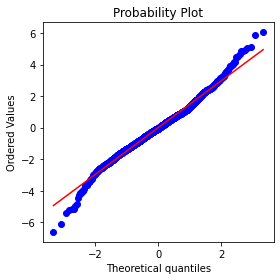

In [26]:
nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx > 0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

## **2.8 Student T Distribution**

https://seismo.berkeley.edu/~kirchner/eps_120/Odds_n_ends/Students_original_paper.pdf

https://onlinestatbook.com/2/estimation/t_distribution.html

## **2.9 Binomial Distribution**

In [27]:
print(stats.binom.pmf(2, n=5, p=0.1))

0.0729


In [28]:
print(stats.binom.cdf(2, n=5, p=0.1))

0.99144


https://www.mathsisfun.com/data/quincunx.html

## **2.12 Poisson and Related Distribution**
### **2.12.1 Poisson Distribution**

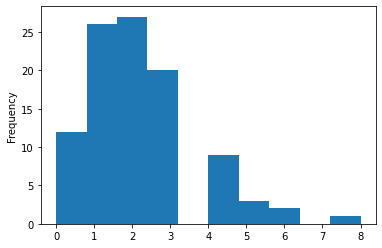

In [29]:
sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist()
plt.show()

### **2.12.2 Exponential Distribution**

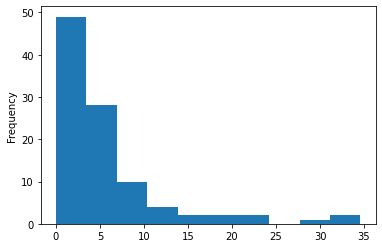

In [30]:
sample = stats.expon.rvs(scale=1/0.2, size=100)

pd.Series(sample).plot.hist()
plt.show()

### **2.12.4 Weibull Distribution**

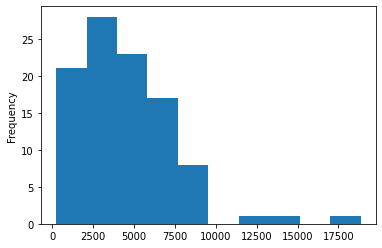

In [31]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()

http://www.ipedr.com/vol75/29_ICQM2014-051.pdf